In [1]:
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

Bias and variance :https://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/

In [2]:
!gdown --id 1cpMEVc8tnj63DO-4Dibq5FLylfMiCkZJ
!gdown --id 12GQiPnUijLM0AS64dLfYoCJ4Mpm0JwXR
!gdown --id 12Q5JdkxxCGaRPw9tOrKL3Ldo33aHByPl
!gdown --id 1EWbLQ0Vwsw1Fo6JcS_aF30KXlYkS1Qvu
!gdown --id 1lUX1gsMeUjnkGH_hMnFUVWYFhFEVO6t_
!gdown --id 1YyMkCLbVvB8gprRL7eqHrT9jP1f3bmmQ
!gdown --id 14Aij8jZtyAdxIR-glPSyIHM3_HKx5Mro


Downloading...
From: https://drive.google.com/uc?id=1cpMEVc8tnj63DO-4Dibq5FLylfMiCkZJ
To: /content/clfObj.pickle
100% 39.1k/39.1k [00:00<00:00, 14.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=12GQiPnUijLM0AS64dLfYoCJ4Mpm0JwXR
To: /content/dataset.pickle
100% 64.5k/64.5k [00:00<00:00, 21.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Q5JdkxxCGaRPw9tOrKL3Ldo33aHByPl
To: /content/scalerObj.pickle
100% 611/611 [00:00<00:00, 1.04MB/s]
Downloading...
From: https://drive.google.com/uc?id=1EWbLQ0Vwsw1Fo6JcS_aF30KXlYkS1Qvu
To: /content/x_test.pickle
100% 18.7k/18.7k [00:00<00:00, 31.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lUX1gsMeUjnkGH_hMnFUVWYFhFEVO6t_
To: /content/x_train.pickle
100% 74.0k/74.0k [00:00<00:00, 27.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YyMkCLbVvB8gprRL7eqHrT9jP1f3bmmQ
To: /content/y_test.pickle
100% 1.58k/1.58k [00:00<00:00, 1.31MB/s]
Downloading...
From: https://drive.google.com/uc?id=14Aij8jZtyAdxIR-glPSyIH

In [3]:
scaler = pickle.load(open('scalerObj.pickle','rb'))
clf = pickle.load(open('clfObj.pickle','rb'))
x_train= pickle.load(open('x_train.pickle','rb'))
x_test= pickle.load(open('x_test.pickle','rb'))
y_train= pickle.load(open('y_train.pickle','rb'))
y_test= pickle.load(open('y_test.pickle','rb'))
df=pickle.load(open('dataset.pickle','rb'))

In [4]:
df

,Survived,Pclass,Sex,Age,Fare,FamilySize,sendirian,Title_Miss.,Title_Mr.,Title_Mrs.,Title_other,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0.339415,0.027567,2,0,0,1,0,0,0,0,1
1,1,1,0,0.591066,0.271039,2,0,0,0,1,0,1,0,0
2,1,3,0,0.402328,0.030133,1,1,1,0,0,0,0,0,1
3,1,1,0,0.543882,0.201901,2,0,0,0,1,0,0,0,1
4,0,3,1,0.543882,0.030608,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0.418056,0.049430,1,1,0,0,0,1,0,0,1
887,1,1,0,0.292230,0.114068,1,1,1,0,0,0,0,0,1
888,0,3,0,0.452403,0.089163,4,0,1,0,0,0,0,0,1
889,1,1,1,0.402328,0.114068,1,1,0,1,0,0,1,0,0


In [5]:
y,x=(df['Survived'].to_numpy(),df.iloc[:,1:].to_numpy())

In [6]:

def plotLearningCurve(model,x_train,y_train):
    train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train,train_sizes=[100,200,300,500,600,858] ,cv=30)

    plt.plot(train_sizes,np.mean(train_scores,axis=1),label='Train Score')
    plt.plot(train_sizes,np.mean(test_scores,axis=1),label='Cross Validation Score')
    plt.legend()
    plt.show()

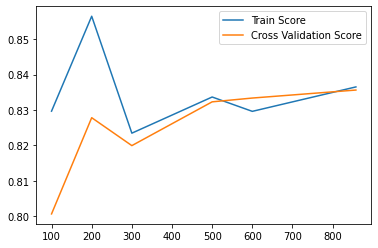

In [ ]:
plotLearningCurve(clf,x,y)

In [15]:
df

,Survived,Pclass,Sex,Age,Fare,FamilySize,sendirian,Title_Miss.,Title_Mr.,Title_Mrs.,Title_other,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0.339415,0.027567,2,0,0,1,0,0,0,0,1
1,1,1,0,0.591066,0.271039,2,0,0,0,1,0,1,0,0
2,1,3,0,0.402328,0.030133,1,1,1,0,0,0,0,0,1
3,1,1,0,0.543882,0.201901,2,0,0,0,1,0,0,0,1
4,0,3,1,0.543882,0.030608,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0.418056,0.049430,1,1,0,0,0,1,0,0,1
887,1,1,0,0.292230,0.114068,1,1,1,0,0,0,0,0,1
888,0,3,0,0.452403,0.089163,4,0,1,0,0,0,0,0,1
889,1,1,1,0.402328,0.114068,1,1,0,1,0,0,1,0,0


In [17]:
tempX=x[:,:-11]
tempX

array([[3., 1.],
       [1., 0.],
       [3., 0.],
       ...,
       [3., 0.],
       [1., 1.],
       [3., 1.]])

Disini kita dalamin bagaimana kalau kita menggunakan fitur yang lebih dikit

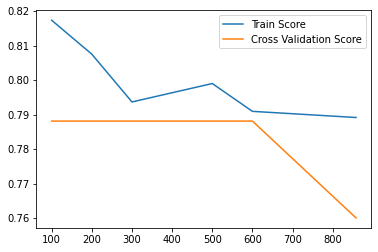

In [18]:
plotLearningCurve(clf,tempX,y)

# Bias Variance

In [19]:
!pip install mlxtend
!pip install mlxtend --upgrade --no-deps


     |████████████████████████████████| 1.3 MB 16.9 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [20]:
from mlxtend.evaluate import bias_variance_decomp

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf, x_train, y_train, x_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.158
Average bias: 0.146
Average variance: 0.023


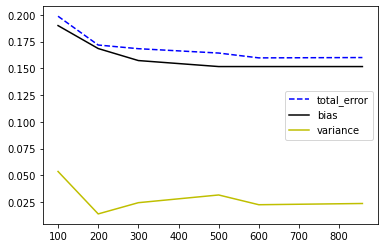

In [22]:
error_fs, bias_fs, var_fs  = [], [], []
feat_count = [100,200,300,500,600,858]
for feat in feat_count:
    
    x_train_fs = x_train[:feat, :]
    x_test_fs = x_test[:feat, :]
    y_train_fs=y_train[:feat]
    y_test_fs=y_test[:feat]

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf, x_train_fs, y_train_fs, x_test_fs, y_test_fs, loss='0-1_loss', random_seed=69)
    error_fs.append(avg_expected_loss)
    bias_fs.append(avg_bias)
    var_fs.append(avg_var)
    
plt.plot(feat_count, error_fs, 'b', label = 'total_error',linestyle='dashed')
plt.plot(feat_count, bias_fs, 'k', label = 'bias')
plt.plot(feat_count, var_fs, 'y', label = 'variance')
plt.legend()

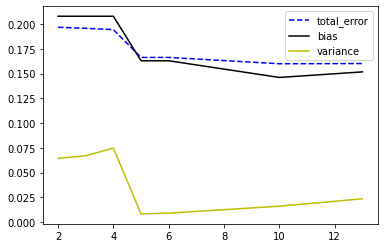

In [23]:
error_fs, bias_fs, var_fs  = [], [], []
feat_count = [2,3,4,5,6,10,13]
for feat in feat_count:
    
    x_train_fs = x_train[:, :feat]
    x_test_fs = x_test[:, :feat]
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf, x_train_fs, y_train, x_test_fs, y_test, loss='0-1_loss', random_seed=69)
    error_fs.append(avg_expected_loss)
    bias_fs.append(avg_bias)
    var_fs.append(avg_var)
    
plt.plot(feat_count, error_fs, 'b', label = 'total_error',linestyle='dashed')
plt.plot(feat_count, bias_fs, 'k', label = 'bias')
plt.plot(feat_count, var_fs, 'y', label = 'variance')
plt.legend()

# miss Klasifikasi


In [24]:
from sklearn.metrics import plot_confusion_matrix

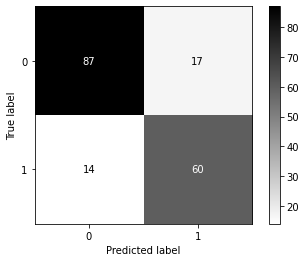

In [25]:
plot_confusion_matrix(clf,x_test,y_test,cmap='binary')
plt.show()

In [39]:
pred=clf.predict(x_test)
indexMiss=np.argwhere(np.not_equal(y_test,pred))
beda=x_test[indexMiss]
beda=beda.reshape(beda.shape[0],beda.shape[2])

temp=df.iloc[:1,:].copy()
temp=temp.drop('Survived',axis=1)

In [40]:
temp

,Pclass,Sex,Age,Fare,FamilySize,sendirian,Title_Miss.,Title_Mr.,Title_Mrs.,Title_other,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0.339415,0.027567,2,0,0,1,0,0,0,0,1


In [32]:
np.not_equal(y_test, pred)

In [30]:
np.argwhere(np.not_equal(y_test, pred))

array([[ 19],
       [ 25],
       [ 30],
       [ 44],
       [ 46],
       [ 47],
       [ 53],
       [ 56],
       [ 61],
       [ 70],
       [ 71],
       [ 78],
       [ 80],
       [ 91],
       [ 94],
       [101],
       [104],
       [107],
       [108],
       [116],
       [128],
       [136],
       [138],
       [140],
       [149],
       [158],
       [160],
       [162],
       [169],
       [175],
       [177]])

In [42]:
help(pd.DataFrame.append)

Help on function append in module pandas.core.frame:

append(self, other, ignore_index=False, verify_integrity=False, sort=False) -> 'DataFrame'
    Append rows of `other` to the end of caller, returning a new object.
    
    Columns in `other` that are not in the caller are added as new columns.
    
    Parameters
    ----------
    other : DataFrame or Series/dict-like object, or list of these
        The data to append.
    ignore_index : bool, default False
        If True, the resulting axis will be labeled 0, 1, …, n - 1.
    verify_integrity : bool, default False
        If True, raise ValueError on creating index with duplicates.
    sort : bool, default False
        Sort columns if the columns of `self` and `other` are not aligned.
    
        .. versionadded:: 0.23.0
        .. versionchanged:: 1.0.0
    
            Changed to not sort by default.
    
    Returns
    -------
    DataFrame
    
    See Also
    --------
    concat : General function to concatenate DataFr

In [43]:
temp.append(pd.DataFrame(beda, columns=temp.columns), ignore_index=True).iloc[1:,:]

,Pclass,Sex,Age,Fare,FamilySize,sendirian,Title_Miss.,Title_Mr.,Title_Mrs.,Title_other,Embarked_C,Embarked_Q,Embarked_S
1,1.0,1.0,0.452403,0.114068,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.622523,0.105402,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,1.0,0.433784,0.134981,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,0.528154,0.100951,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,2.0,0.0,0.402328,0.098859,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,1.0,1.0,0.622523,0.117871,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,3.0,0.0,0.452403,0.028707,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,3.0,0.0,0.701164,0.054959,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,3.0,0.0,0.433784,0.054753,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10,2.0,1.0,0.418056,0.049430,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [27]:
diffDF=temp.append(pd.DataFrame(beda, columns=temp.columns), ignore_index=True).iloc[1:,:]
diffDF['actual']=y_test[indexMiss]
diffDF['predict']=pred[indexMiss]
diffDF[['Age','Fare']]=scaler.inverse_transform(diffDF[['Age','Fare']])

diffDF

,Pclass,Sex,Age,Fare,FamilySize,sendirian,Title_Miss.,Title_Mr.,Title_Mrs.,Title_other,Embarked_C,Embarked_Q,Embarked_S,actual,predict
1,1.0,1.0,29.183783,30.0000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0
2,1.0,1.0,40.000000,27.7208,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,1
3,1.0,1.0,28.000000,35.5000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0
4,1.0,1.0,34.000000,26.5500,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0
5,2.0,0.0,26.000000,26.0000,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
6,1.0,1.0,40.000000,31.0000,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0
7,3.0,0.0,29.183783,7.5500,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
8,3.0,0.0,45.000000,14.4542,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1
9,3.0,0.0,28.000000,14.4000,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
10,2.0,1.0,27.000000,13.0000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1


In [44]:
#Menggunakan best Params
x_train_fs = x_train[:, :5]

clf.fit(x_train_fs,y_train)
x_test_fs = x_test[:, :5]

pred=clf.predict(x_test_fs)
indexMiss=np.argwhere(np.not_equal(y_test,pred))
beda=x_test_fs[indexMiss]
beda=beda.reshape(beda.shape[0],beda.shape[2])

temp=df.iloc[:1,:6].copy()
temp=temp.drop('Survived',axis=1)

diffDF=temp.append(pd.DataFrame(beda, columns=temp.columns), ignore_index=True).iloc[1:,:]
diffDF['actual']=y_test[indexMiss]
diffDF['predict']=pred[indexMiss]
diffDF[['Age','Fare']]=scaler.inverse_transform(diffDF[['Age','Fare']])

diffDF

,Pclass,Sex,Age,Fare,FamilySize,actual,predict
1,1.0,1.0,29.183783,30.0000,1.0,1,0
2,3.0,1.0,9.000000,20.5250,3.0,1,0
3,1.0,1.0,28.000000,35.5000,1.0,1,0
4,1.0,1.0,34.000000,26.5500,1.0,1,0
5,2.0,0.0,26.000000,26.0000,3.0,0,1
6,1.0,1.0,40.000000,31.0000,1.0,1,0
7,3.0,0.0,29.183783,7.5500,1.0,0,1
8,3.0,0.0,45.000000,14.4542,2.0,0,1
9,3.0,0.0,28.000000,14.4000,3.0,0,1
10,1.0,0.0,2.000000,151.5500,4.0,0,1


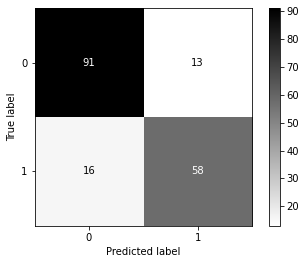

In [ ]:
plot_confusion_matrix(clf,x_test_fs,y_test,cmap='binary')
plt.show()